In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 

In [32]:
datasize = [i for i in range(1000,50000,4000)]
costing = np.array([1.1593992710113525,1.0750575065612793,1.8647911548614502,3.134084939956665,3.7854368686676025,4.124918699264526,4.854902029037476,6.085707902908325,6.817955732345581,8.210808753967285,8.949126243591309,8.811813354492188,9.920644044876099,11.601701021194458,12.335162162780762,12.928038835525513,13.793736696243286,14.36051344871521,15.721477508544922,16.146007299423218,15.814167261123657,18.78689479827881,18.586195945739746,25.214044094085693,25.60512661933899])
time1 = np.array([2.408231737224773 ,12.041158686123865,21.674085635022955,31.307012583922045,40.939939532821136,50.572866481720226,60.20579343061932 ,69.8387203795184 ,79.4716473284175 ,89.10457427731659 ,98.73750122621568 ,108.37042817511478,118.00335512401386,133.4160150562363,143.48514826802773,153.55428147981914,163.62341469161055,173.69254790340196,183.7616811151934,193.8308143269848,203.89994753877622,213.96908075056766,224.0382139623590,234.10734717415048,244.17648038594191])
time2 = np.array([1.1598122119903564,1.080430030822754,1.8770804405212402,3.153338670730591,3.807401180267334,4.151798486709595,4.88705587387085,6.128327131271362,6.860645771026611,8.260687351226807,8.975495338439941,8.846865177154541,9.990851879119873,11.668107271194458,12.420322895050049,13.019129991531372,13.886939287185669,14.45725679397583,15.821130990982056,16.25408935546875,15.922866582870483,18.927108764648438,18.685274839401245,25.460474967956543,25.73815631866455])

In [33]:
constrcution_time = time1 + time2+ costing

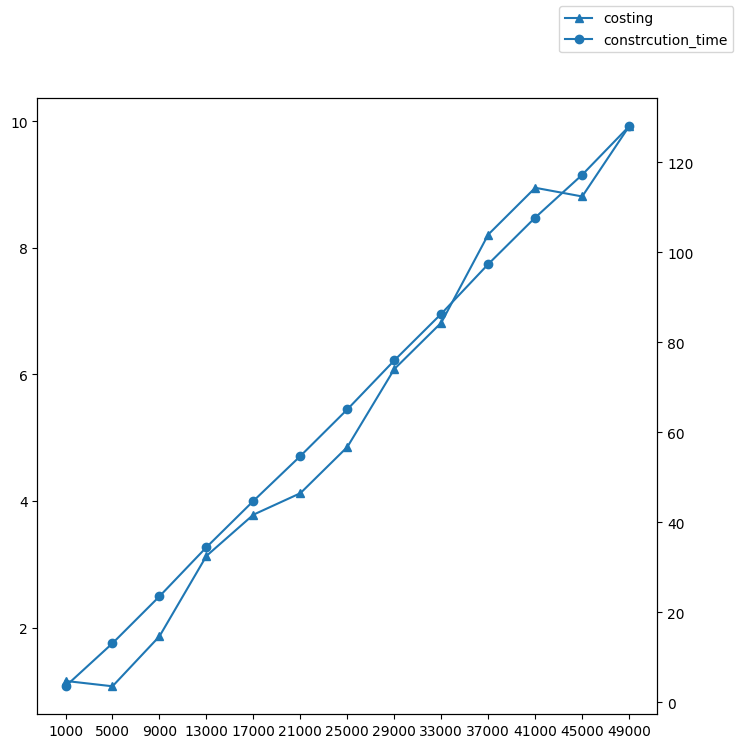

In [4]:
fig , ax = plt.subplots(figsize = (8,8))
ax.plot(datasize, costing, marker = '^', label = 'costing')
ax2 = ax .twinx()
ax2.plot(datasize, constrcution_time, marker = 'o', label = 'constrcution_time')
ax.set_xticks(datasize)
fig.legend()
fig.show()

In [5]:
from downstream.synthesis.synthesis_model_pca_unitary_jax import SynthesisModelNN
import pickle
n_neighbors = 1
datasize = 1000
synthesis_model =  f'eval_datasize/True_5_5_{n_neighbors}_10_{datasize}.pkl'
with open(synthesis_model, 'rb') as f:
    model = pickle.load(f)

In [6]:
datasize = 1000
us = [] 
for i in range(3):
    synthesis_model =  f'eval_datasize/True_5_5_{i}_10_{datasize}.pkl'
    with open(synthesis_model, 'rb') as f:
        res = pickle.load(f)
        us.append(res['U'])

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [8]:
print(us)
with open('us.pkl','wb')as f:
    pickle.dump(us,f) 

[array([[ 0.21867434-0.24100128j, -0.16569674-0.01003035j,
         0.04849788-0.05739144j, ...,  0.18372197+0.03367453j,
        -0.11607813+0.03967866j, -0.17707519+0.19608826j],
       [ 0.13405251+0.00884172j, -0.22145668+0.18665432j,
         0.15266813+0.09092113j, ...,  0.00096314+0.0277576j ,
         0.0499043 +0.18234016j, -0.21328542-0.10824925j],
       [-0.01017702+0.03971472j, -0.11809826+0.11740107j,
         0.05157258+0.00412875j, ..., -0.16595923+0.02340678j,
         0.20316659+0.06053642j, -0.01576959+0.06328527j],
       ...,
       [ 0.00070299+0.08658544j,  0.03791305-0.20937698j,
        -0.01474179-0.13583699j, ...,  0.06758638-0.05608267j,
        -0.03778887-0.04583951j,  0.13984306+0.11680806j],
       [ 0.19011671-0.17528322j, -0.03203991-0.02850739j,
         0.1270081 +0.0681577j , ..., -0.1225033 -0.01505663j,
         0.00617423-0.02290374j, -0.10926691-0.06831249j],
       [-0.06310778+0.00403243j, -0.02227503+0.15509861j,
         0.26332416-0.0226922

In [28]:
# model.keys()
keys = ['cpu time',]# 'heuristic_takeeffect_count', 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time'

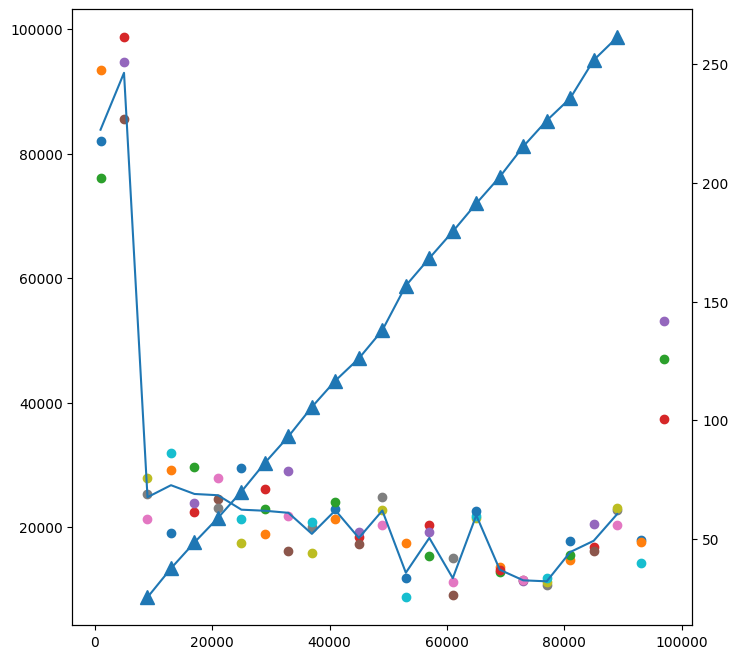

In [41]:
fig , ax = plt.subplots(figsize = (8,8))
for key in keys:
    y = []
    x = []
    for datasize in range(1000,100000,4000):
        # print(datasize)
        _y = []
        for i in range(3):
            synthesis_model =  f'eval_datasize/True_5_5_{i}_10_{datasize}.pkl'
            with open(synthesis_model, 'rb') as f:
                res = pickle.load(f)
                ax.scatter(datasize,res[key])
            _y.append(res[key])
        y.append(np.array(_y).mean())
        x.append(datasize)

ax.plot(x[:-2], y[:-2], label = key)
   
ax2 = ax.twinx()
ax2.plot(x[2:-2], constrcution_time[2:-2], marker = '^', label = 'constrcution_time', markersize = 10)
  

In [42]:
fig.savefig('constrcution_time.svg')

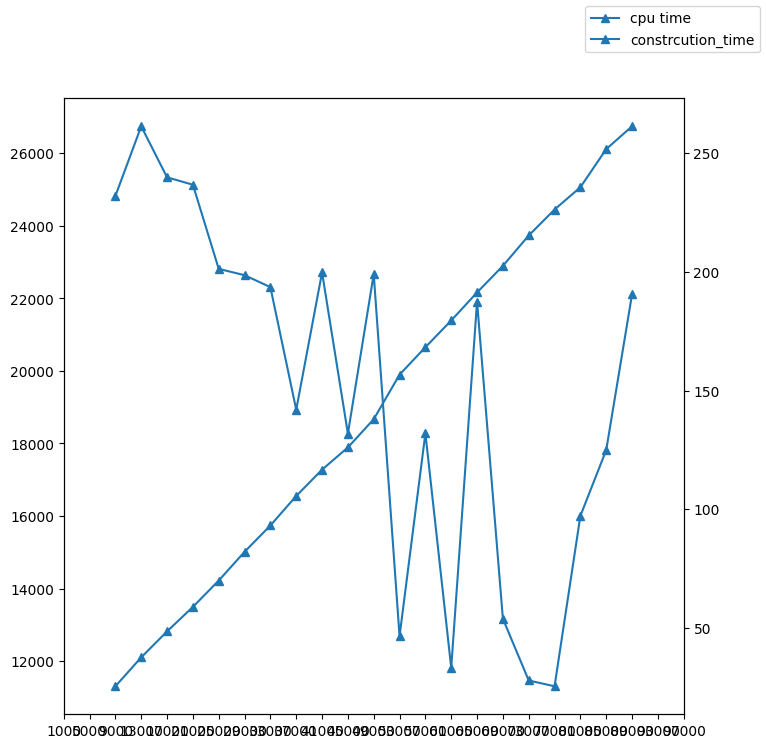

In [38]:
fig , ax = plt.subplots(figsize = (8,8))
ax.plot(x[2:-2], y[2:-2], marker = '^', label = key)
ax2 = ax.twinx()
ax2.plot(x[2:-2], constrcution_time[2:-2], marker = '^', label = 'constrcution_time')
ax.set_xticks(x)
fig.legend()
fig.show()
fig.savefig(key+'.svg')

In [18]:
import os 
import pickle 
files=os.listdir('4_test/result')
print(files)
print(len(files))

results = []
cnt = []
for file in files:
    with open('4_test/result/'+file,'rb') as f:
        res = pickle.load(f)
        results.append(res)
        cnt.append(res['iter_count'])

['True_5_random-4-0.json_2_7.pkl', 'True_5_random-4-1.json_2_1.pkl', 'True_5_random-4-1.json_2_13.pkl', 'True_5_random-4-1.json_2_10.pkl', 'True_5_random-4-0.json_2_13.pkl', 'True_5_random-4-0.json_2_4.pkl', 'True_5_random-4-1.json_2_4.pkl', 'True_5_random-4-1.json_2_19.pkl', 'True_5_random-4-0.json_2_10.pkl', 'True_5_random-4-1.json_2_16.pkl', 'True_5_random-4-1.json_2_7.pkl', 'True_5_random-4-0.json_2_1.pkl', 'True_5_random-4-0.json_2_16.pkl', 'True_5_random-4-0.json_2_19.pkl']
14


In [19]:
import numpy as np
np.array(cnt).mean()

11.357142857142858

In [44]:
with open('base5.log','rb') as f:
    lines = f.readlines()
    for line in lines :
        line = str(line)
        if 'candiate selection cost' in line:
            print(line)

b'candiate selection cost 38.993799686431885\r\n'
b'candiate selection cost 65.39877223968506\r\n'
b'candiate selection cost 45.36514115333557\r\n'
b'candiate selection cost 63.37382888793945\r\n'
b'candiate selection cost 43.74656867980957\r\n'
b'candiate selection cost 50.91894054412842\r\n'
b'candiate selection cost 60.32508969306946\r\n'
b'candiate selection cost 54.33094239234924\r\n'
b'candiate selection cost 64.71462726593018\r\n'
b'candiate selection cost 59.60235810279846\r\n'
b'candiate selection cost 93.52648544311523\r\n'
b'candiate selection cost 92.62880492210388\r\n'
b'candiate selection cost 73.03355407714844\r\n'
b'candiate selection cost 99.4496660232544\r\n'
b'candiate selection cost 74.64218163490295\r\n'
b'candiate selection cost 78.43597555160522\r\n'
b'candiate selection cost 89.78136897087097\r\n'
b'candiate selection cost 121.30509853363037\r\n'
b'candiate selection cost 76.34220886230469\r\n'
b'candiate selection cost 58.612850189208984\r\n'
b'candiate selecti